# Setup Fastai

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [53]:
from fastai.vision import *
from fastai.metrics import error_rate

## Create Path to Dataset

In [54]:
path = Path('data')

In [55]:
path.ls()

[PosixPath('data/cardboard'),
 PosixPath('data/cigarette'),
 PosixPath('data/glass'),
 PosixPath('data/metal'),
 PosixPath('data/models'),
 PosixPath('data/paper'),
 PosixPath('data/plastic'),
 PosixPath('data/plastic_bag'),
 PosixPath('data/trash'),
 PosixPath('data/.DS_Store'),
 PosixPath('data/export.pkl')]

## Create Fastai Dataset

In [56]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [57]:
data.classes

['cardboard',
 'cigarette',
 'glass',
 'metal',
 'paper',
 'plastic',
 'plastic_bag',
 'trash']

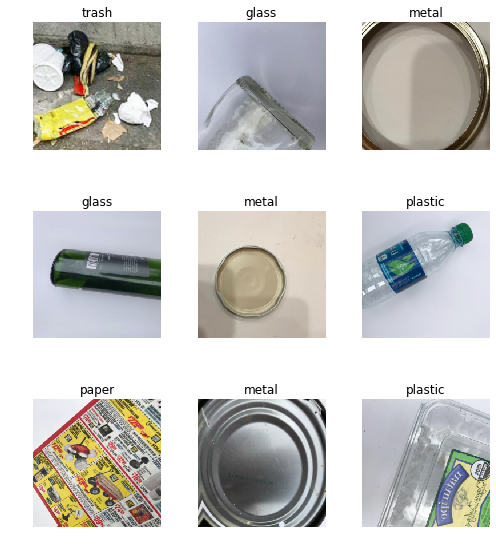

In [58]:
data.show_batch(rows=3, figsize=(7,8))

In [59]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cardboard',
  'cigarette',
  'glass',
  'metal',
  'paper',
  'plastic',
  'plastic_bag',
  'trash'],
 8,
 2405,
 601)

# Train CNN Model (1st stage)

In [66]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [67]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.818837,0.620726,0.805324,01:07
1,1.130286,0.531258,0.835275,01:06
2,0.820251,0.458806,0.855241,01:09
3,0.618942,0.422773,0.871880,01:08
4,0.499835,0.418666,0.878536,01:07


In [68]:
learn.save('stage-1')

## Find Optimal Learning Rate

In [69]:
learn.unfreeze()

In [70]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


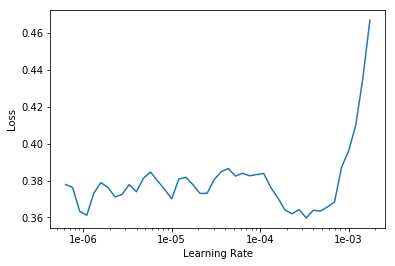

In [71]:
learn.recorder.plot()

# Retrain Model with new Learning Rate (2nd stage)

In [72]:
learn.fit_one_cycle(3, max_lr=1.5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.401812,0.592145,0.813644,01:10
1,0.374622,0.409288,0.880200,01:09
2,0.259016,0.351961,0.906822,01:04


In [73]:
learn.save('stage-2')

# Retrain Model with new Learning Rate (3nd stage)

In [74]:
learn.unfreeze()

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


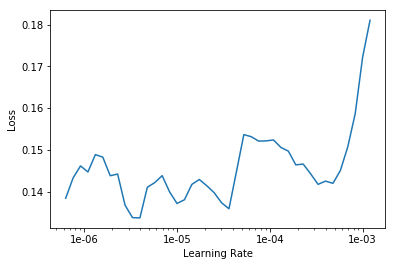

In [76]:
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(10, max_lr=2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.125209,0.334046,0.896839,00:57
1,0.107927,0.405801,0.878536,00:57
2,0.140141,0.738019,0.821963,00:57
3,0.202319,0.706365,0.843594,00:57
4,0.184095,0.511403,0.873544,00:57
5,0.155445,0.478910,0.890183,00:57
6,0.112081,0.420517,0.898502,00:58
7,0.074672,0.382837,0.910150,00:57
8,0.050298,0.396709,0.910150,00:57
9,0.035483,0.388797,0.911814,01:01


In [79]:
learn.save('stage-3')

# Interpret and Analyze Model

In [80]:
learn.load('stage-3');

In [81]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [82]:
interp = ClassificationInterpretation.from_learner(learn)

In [83]:
interp.most_confused()

[('plastic', 'glass', 7),
 ('cigarette', 'plastic_bag', 4),
 ('cigarette', 'trash', 4),
 ('glass', 'metal', 4),
 ('glass', 'plastic', 4),
 ('metal', 'glass', 4),
 ('plastic', 'trash', 4),
 ('paper', 'trash', 3),
 ('trash', 'plastic_bag', 3),
 ('cardboard', 'glass', 2),
 ('cardboard', 'paper', 2),
 ('plastic_bag', 'trash', 2),
 ('trash', 'cigarette', 2),
 ('trash', 'paper', 2),
 ('cardboard', 'plastic', 1),
 ('cigarette', 'metal', 1),
 ('plastic', 'metal', 1),
 ('plastic', 'paper', 1),
 ('trash', 'cardboard', 1),
 ('trash', 'plastic', 1)]

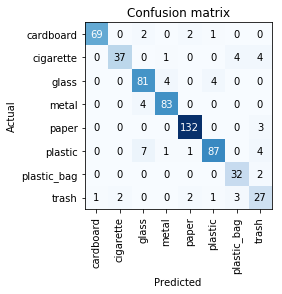

In [84]:
interp.plot_confusion_matrix()

# Test Model with Example Test Image

In [85]:
learn.export()

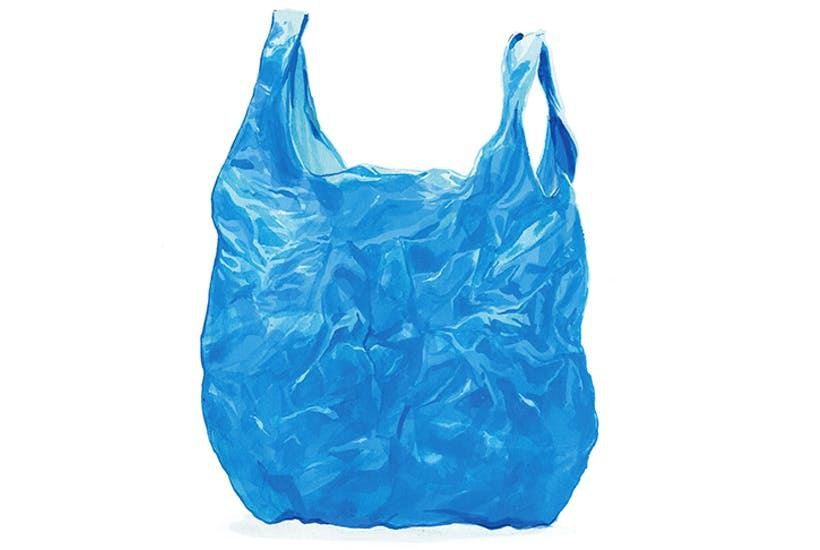

In [89]:
test_img = open_image('./test_data/test2.jpg')
test_img

In [87]:
learn = load_learner(path)

In [88]:
pred_class,pred_idx,outputs = learn.predict(test_img)
pred_class

Category metal

## Success! :)